In [1]:
from IPython.display import Audio
from utils.matching_sound_processing import MSP

In [2]:
TARGET = "/Users/pm/CloudStation/Drive/ComputerMusicCoding/MatchingPursuit/audio_file/vox.wav"
SOURCE = "/Users/pm/CloudStation/Drive/ComputerMusicCoding/MatchingPursuit/audio_file/classical.wav"
SR = 44100

In [3]:
mpd = MSP(target_path=TARGET, source_path=SOURCE, sr=SR)

# create atoms and time-freq dictionary
mpd.generate_atoms(mode="variable", wlenmin=1024, wlenmax=4096, hopsizemin=0.25, hopsizemax=2.1, nwin=10)

# generaete matching atoms
mpd.matching(k=10, eps=1e-6)

# rebuild target
yd = mpd.perform_rebuild()


Generate target atoms...


100%|██████████| 225/225 [00:00<00:00, 17330.24it/s]



Done!

Generate dictionary...



100%|██████████| 10/10 [00:00<00:00, 10.39it/s]



Done!


MATCHING ATOMS...



100%|██████████| 225/225 [00:03<00:00, 61.21it/s]


DONE!



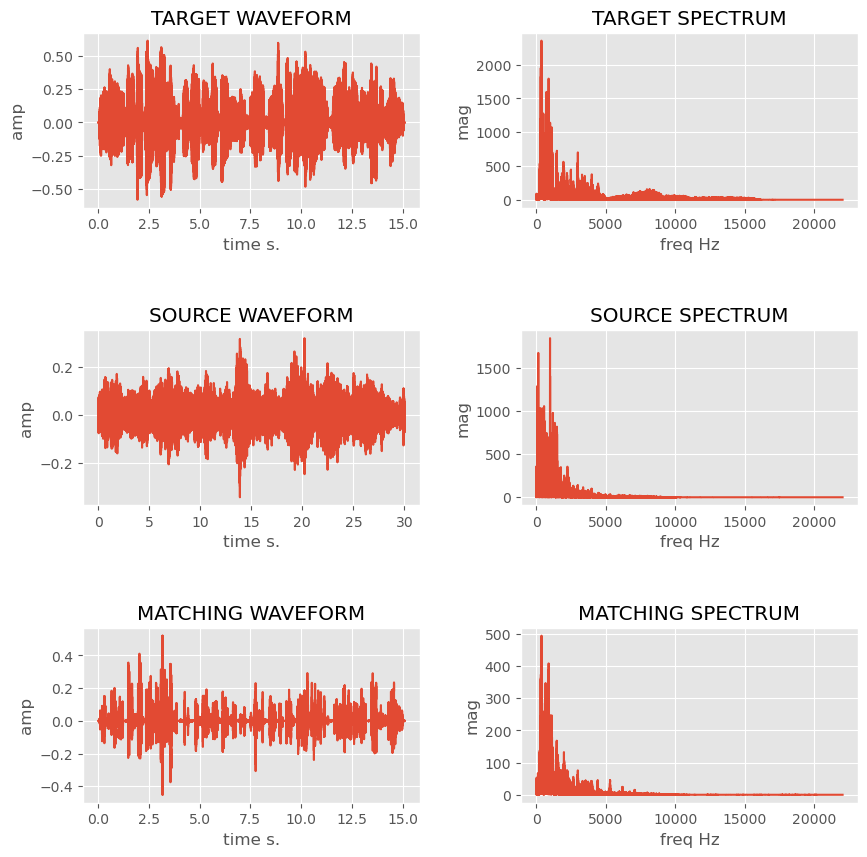

In [4]:
mpd.plot_results()

In [5]:
# target frames
target_atoms = mpd.matching_pursuit.target_atoms

# dictionary
dictionary = mpd.matching_pursuit.dictionary

# coeffs with best index
coeffs = mpd.matching_pursuit.coeffs

# atoms with best index
atoms = mpd.matching_pursuit.atoms

# result of the product between coeffs and atoms with best index
matching_atoms = mpd.matching_pursuit.matching_atoms

In [6]:
Audio(yd, rate=SR)

In [7]:
mps = MSP(target_path=TARGET, source_path=SOURCE, sr=SR)

# create atoms and time-freq dictionary
mps.generate_atoms(mode="fixed", wlen=4096, hopsize=0.5)

# generaete matching signal
mps.matching(k=30, eps=1e-6)

# rebuild target
ys = mps.perform_rebuild()


Generate target atoms...


100%|██████████| 325/325 [00:00<00:00, 22267.85it/s]



Done!

Generate dictionary...



100%|██████████| 1/1 [00:00<00:00, 27.69it/s]



Done!


MATCHING ATOMS...



100%|██████████| 325/325 [00:33<00:00,  9.71it/s]


DONE!



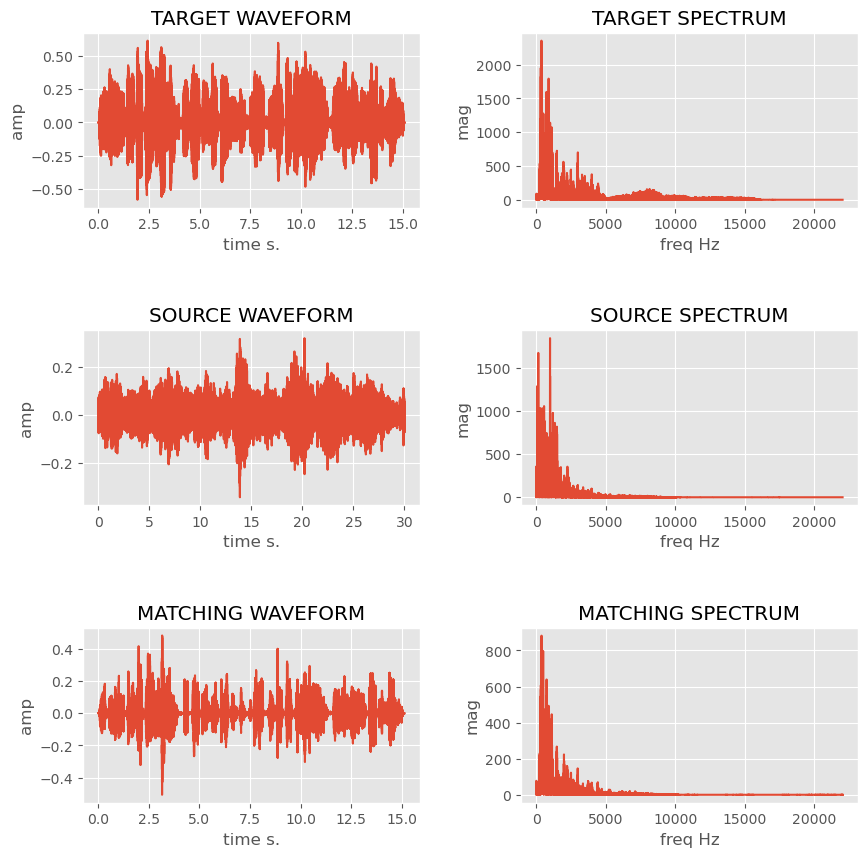

In [8]:
mps.plot_results()

In [9]:
Audio(ys, rate=SR)